In [1]:
import pandas as pd 

In [2]:
dataset = pd.read_csv("50_Startups.csv")

In [3]:
dataset 

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
dataset = pd.get_dummies(dataset, columns=['State'])

C:\Users\tassi\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


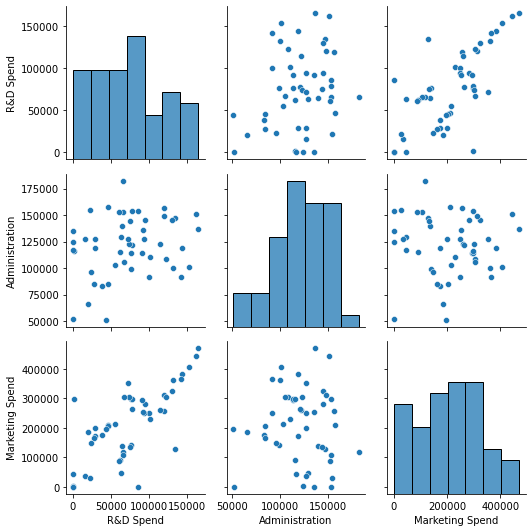

In [5]:
import matplotlib.pyplot as plt 
import seaborn as sns 
cols = ['R&D Spend', 'Administration', 'Marketing Spend'] 
sns.pairplot(dataset[cols], size=2.5) 
plt.tight_layout() 
plt.show()

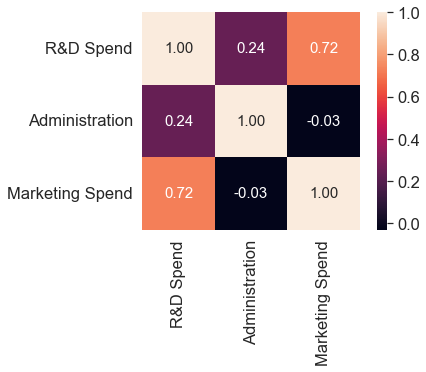

In [6]:
import numpy as np 
cm = np.corrcoef(dataset[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols, xticklabels=cols)
plt.show()

In [7]:
cols = ['R&D Spend', 'Administration', 'Marketing Spend', 'State_California', 'State_Florida', 'State_New York']
X = dataset.loc[:, cols]
y = dataset.loc[:, 'Profit']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression() 
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

In [10]:
score = regressor.score(X_test, y_test)

In [11]:
w = regressor.coef_

In [12]:
score

0.9347068473282424

In [13]:
cdf = pd.DataFrame(regressor.coef_, X.columns, columns=['Coeficientes'])
print(cdf)

                  Coeficientes
R&D Spend             0.773467
Administration        0.032885
Marketing Spend       0.036610
State_California     86.638369
State_Florida      -872.645791
State_New York      786.007422


In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
from sklearn.linear_model import LinearRegression

regressor2 = LinearRegression() 
regressor2.fit(X_train, y_train)

y_pred = regressor2.predict(X_test)

In [16]:
score_new = regressor2.score(X_test, y_test)

In [17]:
w_new = regressor2.coef_

In [18]:
score_new

0.9347068473282428

In [19]:
cdf = pd.DataFrame(regressor2.coef_, X.columns, columns=['Coeficientes'])
print(cdf)

                  Coeficientes
R&D Spend         35726.287742
Administration      851.301634
Marketing Spend    4519.882777
State_California     15.526639
State_Florida      -401.658486
State_New York      348.694671


In [20]:
from sklearn.linear_model import Ridge

ridge = Ridge() 
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

In [21]:
score2 = ridge.score(X_test, y_test)

In [22]:
w2 = ridge.coef_

In [23]:
score2

0.9220045315965552

In [24]:
cdf = pd.DataFrame(ridge.coef_, X.columns, columns=['Coeficientes'])
print(cdf)

                  Coeficientes
R&D Spend         33754.220062
Administration     1396.913554
Marketing Spend    5767.225580
State_California    -46.810568
State_Florida      -541.079268
State_New York      539.293483


In [25]:
from sklearn.linear_model import Lasso

lasso = Lasso() 
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)

In [26]:
score3 = lasso.score(X_test, y_test)

In [27]:
w3 = lasso.coef_

In [28]:
score3

0.9347508721039857

In [29]:
cdf = pd.DataFrame(lasso.coef_, X.columns, columns=['Coeficientes'])
print(cdf)

                  Coeficientes
R&D Spend         35731.463718
Administration      849.011538
Marketing Spend    4515.193302
State_California    -88.185497
State_Florida      -492.464134
State_New York      246.303848


In [30]:
from sklearn.linear_model import ElasticNet

Elastic = ElasticNet() 
Elastic.fit(X_train, y_train)

y_pred = Elastic.predict(X_test)

In [31]:
score4 = Elastic.score(X_test, y_test)

In [32]:
w4 = Elastic.coef_

In [33]:
score4

0.7466664683739789

In [34]:
cdf = pd.DataFrame(Elastic.coef_, X.columns, columns=['Coeficientes'])
print(cdf)

                  Coeficientes
R&D Spend         20152.494521
Administration     3817.662632
Marketing Spend   10315.102082
State_California   -711.266754
State_Florida      -782.568345
State_New York     1441.545563


In [35]:
from sklearn.linear_model import ElasticNet

Elastic2 = ElasticNet(l1_ratio=0.1) 
Elastic2.fit(X_train, y_train)

y_pred = Elastic2.predict(X_test)

In [36]:
score5 = Elastic2.score(X_test, y_test)

In [37]:
w5 = Elastic2.coef_

In [38]:
score5

0.6546727117733115

In [39]:
cdf = pd.DataFrame(Elastic2.coef_, X.columns, columns=['Coeficientes'])
print(cdf)

                  Coeficientes
R&D Spend         16161.569982
Administration     3756.950145
Marketing Spend    9632.468263
State_California   -907.237594
State_Florida      -578.378481
State_New York     1456.979606
